In [3]:
%matplotlib inline
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt


In [4]:
from sklearn.datasets import load_breast_cancer
cancer_data=load_breast_cancer()

In [5]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cancer_data.data,cancer_data.target,stratify=cancer_data.target,shuffle=True,random_state=144)

In [7]:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
df=pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=3000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [14]:
print("train set accuracy:{:.3f}".format(logreg.score(X_train,y_train)))
print("test set accuracy:{:.3f}".format(logreg.score(X_test,y_test)))

train set accuracy:0.962
test set accuracy:0.951


In [15]:
pred=logreg.predict(X_test)
print(pred)

[0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1]


In [16]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred)
print("Confusion Matrix:\n{}".format(confusion))

Confusion Matrix:
[[47  6]
 [ 1 89]]


In [17]:
from sklearn.metrics import f1_score
f1_score(y_test,pred)

0.9621621621621621

In [18]:
from sklearn.metrics import classification_report
classification=classification_report(y_test,pred,target_names=['malignant', 'benign'])
print(classification)

              precision    recall  f1-score   support

   malignant       0.98      0.89      0.93        53
      benign       0.94      0.99      0.96        90

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [19]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,logreg.decision_function(X_test))

In [20]:
thresholds

array([         inf,  13.30054093,   2.52950354,   2.51970914,
         1.90248406,   1.74758293,   1.07354134,  -1.65000996,
        -1.65110548, -35.6152194 ])

In [21]:
np.argmin(np.abs(thresholds))

6

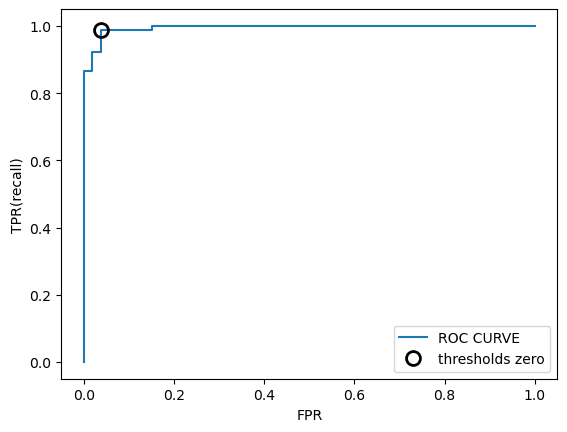

In [22]:
plt.plot(fpr,tpr,label="ROC CURVE")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
nearest_to_zero=np.argmin(np.abs(thresholds))
plt.plot(fpr[nearest_to_zero],tpr[nearest_to_zero],'o',markersize=10,label="thresholds zero",fillstyle="none",c="k",mew=2)
plt.legend(loc=4)

In [28]:
from sklearn.metrics import roc_auc_score
logreg_auc=roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
print("The AUC :{:.3f}".format(logreg_auc))

The AUC :0.995
